# Get Synapse candidates

This notebook will 
1. load the images for tp1 and tp2 live imaging
2. get synapse candidates using the pretrained Stardist model
3. save the images with the segmented candidates
4. [? depends on probability ... so maybe skipp?] get the centroids for each candidate and save them

## 0. Import packages

In [1]:
# make sure the package autoreloads
%load_ext autoreload
%autoreload 2

In [62]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
# matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread, imwrite
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap
from stardist.models import Config3D, StarDist3D

np.random.seed(6)
lbl_cmap = random_label_cmap()

import tensorflow as tf
print(f" TENSORFLOW : {tf.__version__}")

from inhipy.utils.plotter import plot_slice_with_insert
from inhipy.segmentation.preprocess import plot_segmentation_example

 TENSORFLOW : 2.11.0


Load synapse image

In [3]:
synapse_img_tp1 = imread("/ply/repos/u01/synapse/data/full_pipeline/" \
                     "2023-04-05_15dpf_GAD1b_Full experiment/Fish1_48_TP1.lsm")
print(f"Synapse image shape: {synapse_img_tp1.shape}")

Synapse image shape: (128, 1024, 1024)


In [4]:
# synapse_img_tp2 = imread("/ply/repos/u01/synapse/data/full_pipeline/" \
#                      "2023-04-05_15dpf_GAD1b_Full experiment/Fish1_48_TP2_learner.lsm")
# print(f"Synapse image shape: {synapse_img_tp2.shape}")

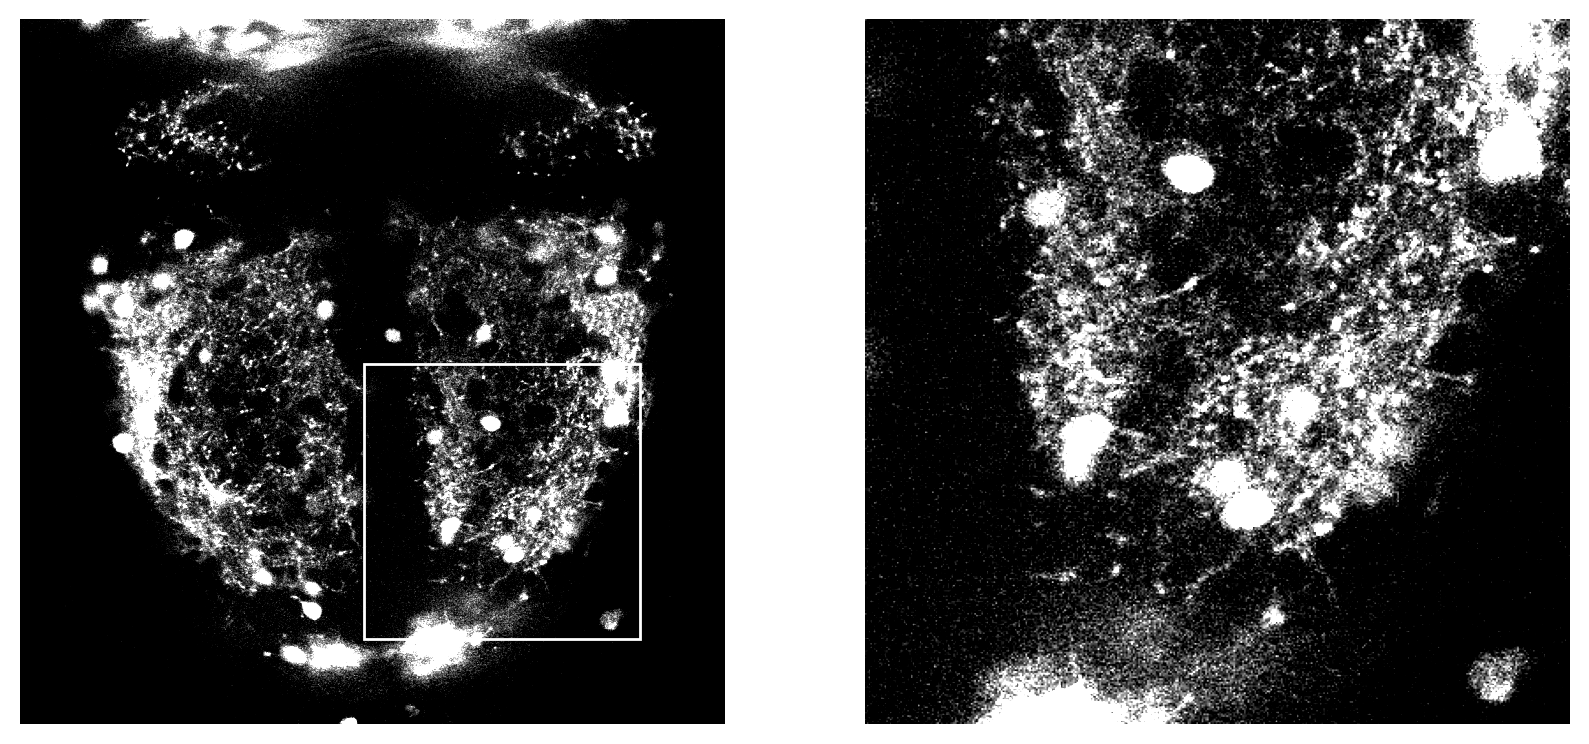

In [5]:
plot_slice_with_insert(synapse_img_tp1, 
                        slice = 80, zoom_in_region= (500,500, 400, 400), #(x, y, width, height)
                        vmin = 400, vmax = 2200)

Load saved model:

In [6]:
models_dir = "/ply/repos/u01/synapse/inhipy/models/01_Synapse_Stardist_Train/"
model = StarDist3D(None, name='v0.0.1', basedir=models_dir)
model

2023-04-29 23:26:27.156468: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 23:26:27.156678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 23:26:27.158347: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 23:26:27.158519: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 23:26:27.158676: I tensorflow/compiler/xla/stream_executo

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.427093, nms_thresh=0.4.


StarDist3D(v0.0.1): ZYXC → ZYXC
├─ Directory: /ply/repos/u01/synapse/inhipy/models/01_Synapse_Stardist_Train/v0.0.1
└─ Config3D(anisotropy=(1.6666666666666667, 1.0, 1.0), axes='ZYXC', backbone='unet', grid=(1, 1, 1), n_channel_in=1, n_channel_out=17, n_classes=None, n_dim=3, n_rays=16, net_conv_after_unet=128, net_input_shape=[None, None, None, 1], net_mask_shape=[None, None, None, 1], rays_json={'name': 'Rays_GoldenSpiral', 'kwargs': {'n': 16, 'anisotropy': (1.6666666666666667, 1.0, 1.0)}}, train_background_reg=0.0001, train_batch_size=100, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_class_weights=[1, 1], train_dist_loss='mae', train_epochs=100, train_foreground_only=0.9, train_learning_rate=0.0003, train_loss_weights=[1, 0.2], train_n_val_patches=None, train_patch_size=[32, 32, 32], train_reduce_lr={'factor': 0.5, 'patience': 40, 'min_delta': 0}, train_sample_cache=True, train_steps_per_epoch=100, train_t

In [7]:
# preprocess same way you did for training:
axis_norm = (0,1,2)   # normalize channels independently

synapse_img_tp1 = normalize(synapse_img_tp1,1,99.8,axis=axis_norm)

In [10]:
labels, details = model.predict_instances(synapse_img_tp1, n_tiles=(1,4,4), return_predict=True)

  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 1/16 [00:01<00:22,  1.47s/it]

1/1 [==============================] - 0s 36ms/step


 12%|█▎        | 2/16 [00:02<00:18,  1.34s/it]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 3/16 [00:03<00:16,  1.30s/it]

1/1 [==============================] - 0s 37ms/step


 25%|██▌       | 4/16 [00:05<00:15,  1.28s/it]

1/1 [==============================] - 0s 36ms/step


 31%|███▏      | 5/16 [00:06<00:14,  1.32s/it]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 6/16 [00:07<00:12,  1.30s/it]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 7/16 [00:09<00:11,  1.28s/it]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 8/16 [00:10<00:10,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 9/16 [00:11<00:09,  1.30s/it]

1/1 [==============================] - 0s 35ms/step


 62%|██████▎   | 10/16 [00:12<00:07,  1.28s/it]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 11/16 [00:14<00:06,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 12/16 [00:15<00:05,  1.26s/it]

1/1 [==============================] - 0s 38ms/step


 81%|████████▏ | 13/16 [00:16<00:03,  1.30s/it]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 14/16 [00:18<00:02,  1.29s/it]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 15/16 [00:19<00:01,  1.28s/it]

1/1 [==============================] - 0s 37ms/step


100%|██████████| 16/16 [00:20<00:00,  1.29s/it]


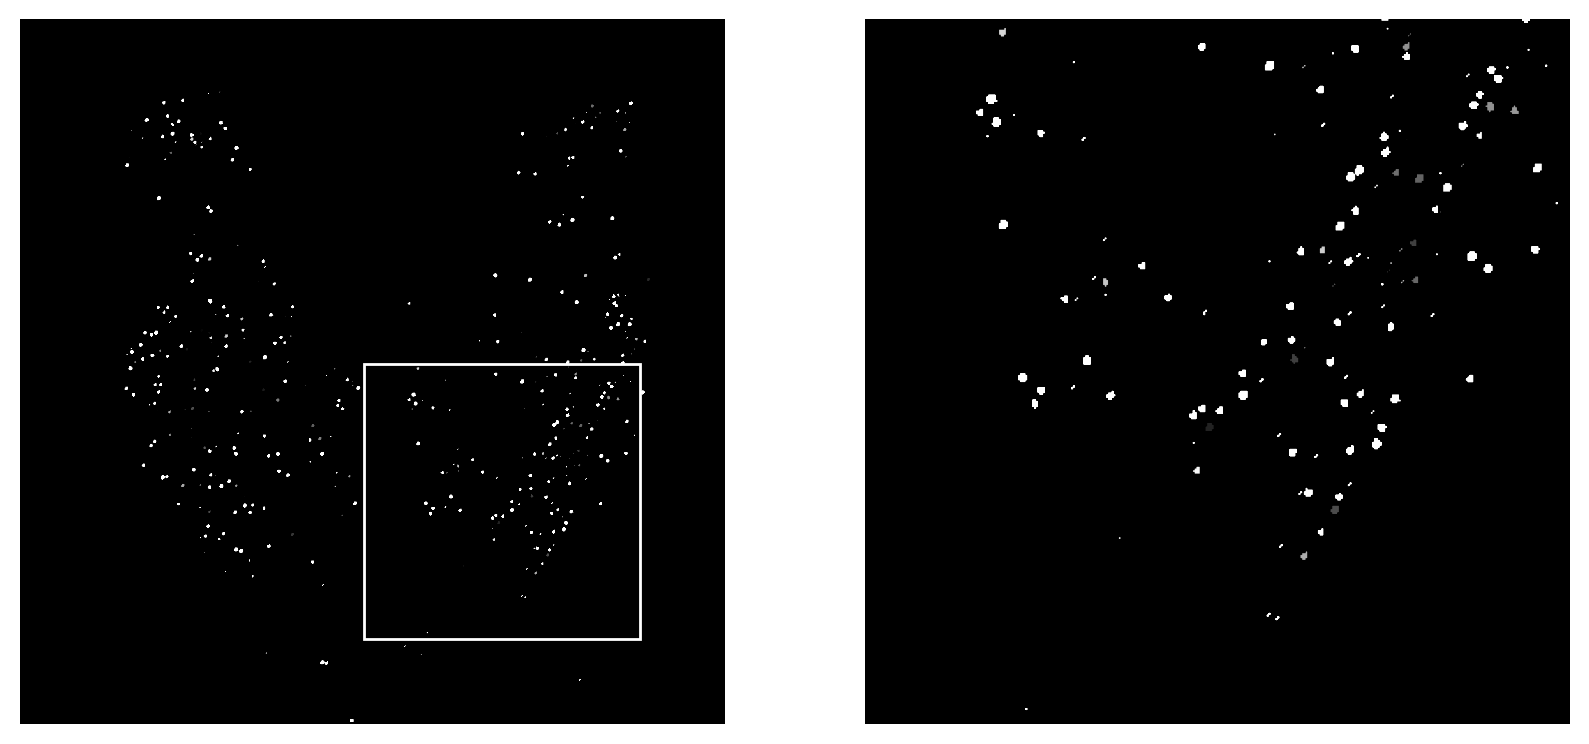

In [21]:
plot_slice_with_insert(labels[0],  
                        slice = 80, zoom_in_region= (500,500, 400, 400), #(x, y, width, height)
                        vmin = 400, vmax = 2200)

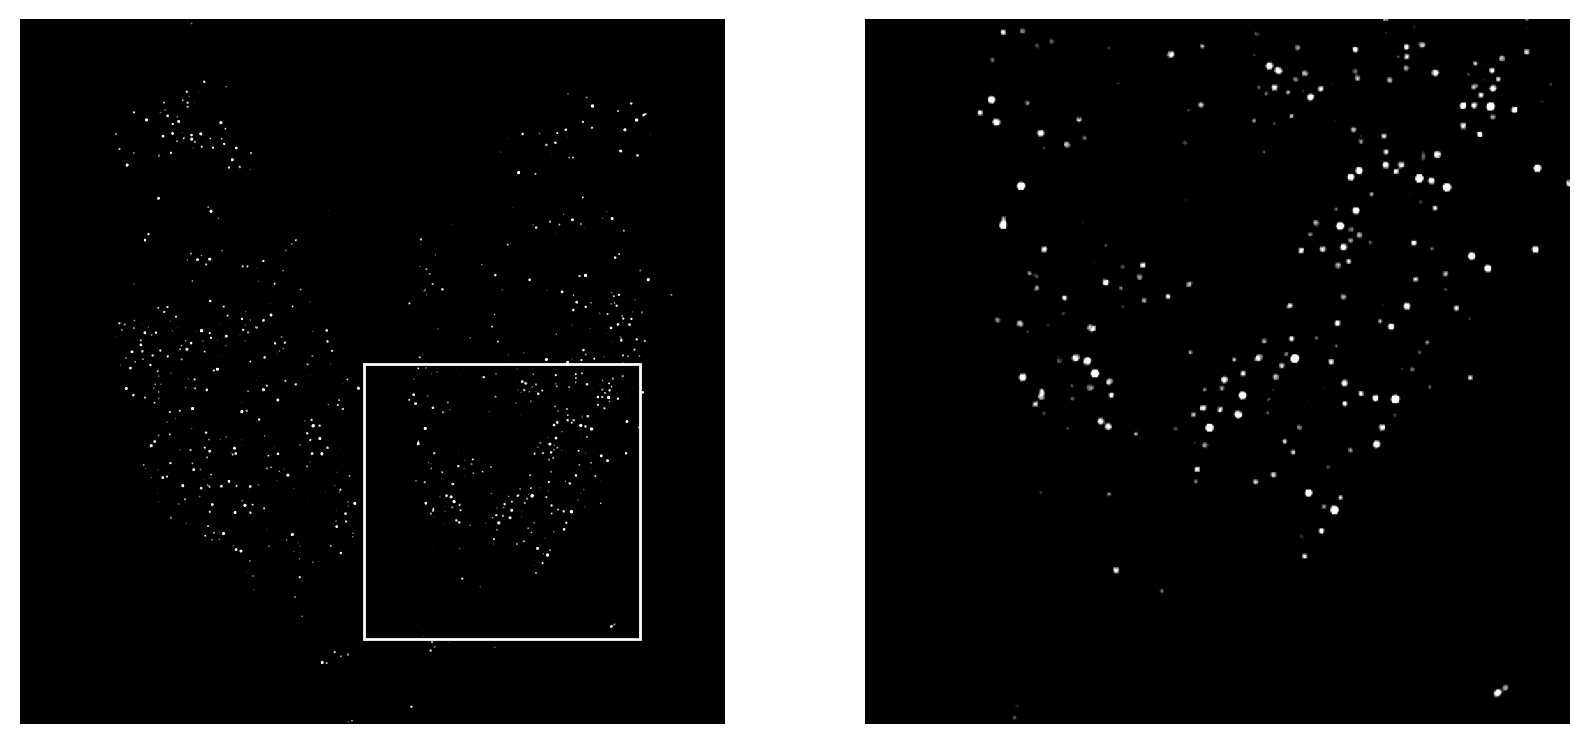

In [29]:
plot_slice_with_insert(details[0], 
                        slice = 80, zoom_in_region= (500,500, 400, 400), #(x, y, width, height)
                        vmin = 0.05, vmax = 0.3)

In [24]:
plot_slice_with_insert(labels[0],  
                        slice = 80, zoom_in_region= (500,500, 400, 400), #(x, y, width, height)
                        vmin = 400, vmax = 2200)

0.7595268

In [30]:
labels, details = model.predict_instances(synapse_img_tp1, n_tiles=(1,4,4), return_predict=True, prob_thresh = 0.1)

base.py (703): Setting sparse to False because return_predict is True
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 1/16 [00:01<00:22,  1.50s/it]

1/1 [==============================] - 0s 37ms/step


 12%|█▎        | 2/16 [00:02<00:18,  1.35s/it]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 3/16 [00:03<00:16,  1.30s/it]

1/1 [==============================] - 0s 34ms/step


 25%|██▌       | 4/16 [00:05<00:15,  1.28s/it]

1/1 [==============================] - 0s 37ms/step


 31%|███▏      | 5/16 [00:06<00:14,  1.31s/it]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 6/16 [00:07<00:12,  1.28s/it]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 7/16 [00:09<00:11,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 8/16 [00:10<00:10,  1.26s/it]

1/1 [==============================] - 0s 37ms/step


 56%|█████▋    | 9/16 [00:11<00:09,  1.29s/it]

1/1 [==============================] - 0s 36ms/step


 62%|██████▎   | 10/16 [00:12<00:07,  1.27s/it]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 11/16 [00:14<00:06,  1.26s/it]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 12/16 [00:15<00:05,  1.25s/it]

1/1 [==============================] - 0s 37ms/step


 81%|████████▏ | 13/16 [00:16<00:03,  1.29s/it]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 14/16 [00:17<00:02,  1.28s/it]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 15/16 [00:19<00:01,  1.27s/it]

1/1 [==============================] - 0s 36ms/step


100%|██████████| 16/16 [00:20<00:00,  1.28s/it]


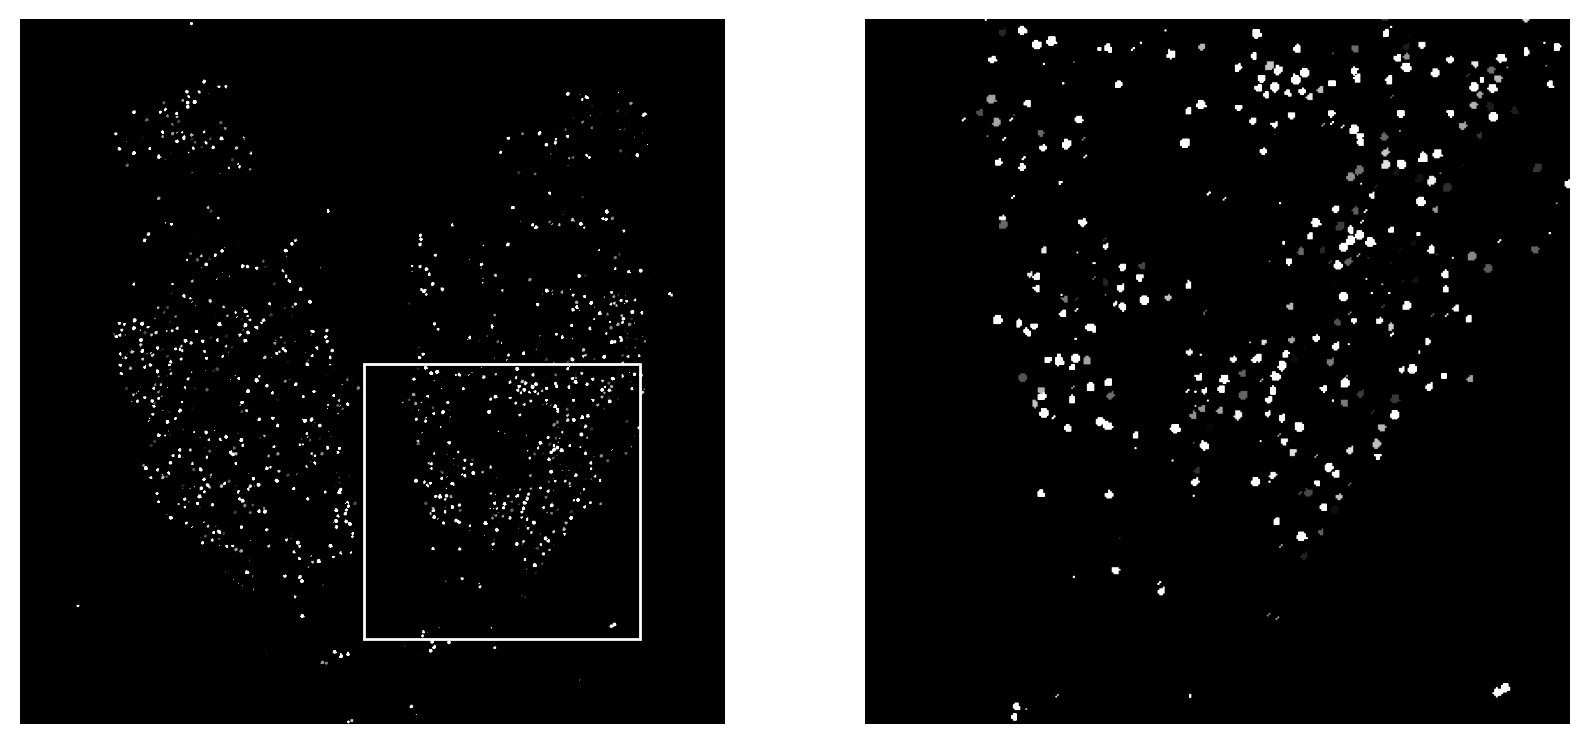

In [32]:
plot_slice_with_insert(labels[0],  
                        slice = 80, zoom_in_region= (500,500, 400, 400), #(x, y, width, height)
                        vmin = 400, vmax = 10000)

Save labels as uint16:

In [81]:
# save the labels image as tiff
experiment_dir = "/ply/repos/u01/synapse/data/processed/full_pipeline/2023-04-05_15dpf_GAD1b_Full experiment/"
synapse_cand_img_folder = experiment_dir + "Fish1_learner/synapses/candidate_img/"
Path(synapse_cand_img_folder).mkdir(parents=True, exist_ok=True)

synapse_cand_file = synapse_cand_img_folder + "satrdist_v0.0.1_tp1.tif"

print(type(labels[0]))
print(labels[0].dtype)

print(np.max(labels[0]))
print(np.min(labels[0]))

#assert all values can fint into the uint range
assert np.max(labels[0]) < 65535, "some labels image values are too large for uint16"
assert np.min(labels[0]) >= 0, "some labels image values are too small for uint16"

imwrite(synapse_cand_file, labels[0].astype('uint16'))

<class 'numpy.ndarray'>
int32
26128
0


In [82]:
# check the saved image
synapse_cand_img = imread(synapse_cand_file)
print(np.max(synapse_cand_img))
print(np.min(synapse_cand_img))

26128
0


Save the probability image multiplied by 10,000 to write it as uint16:

In [84]:
# this is just to troubleshoot that the probability is recorded corectly
synapse_prob_file = synapse_cand_img_folder + "satrdist_v0.0.1_prob_x10K_tp1.tif"
print(np.max(details[0]))
print(np.min(details[0]))

SCALE = 10000
imwrite(synapse_prob_file, (details[0]*SCALE).astype('uint16'))

0.7595268
2.096156e-14


SAve the details csv:

In [89]:
import pandas as pd

# crete candidate dataframe with ID (row id) , zyx coord, prob
synapse_cand_df = pd.DataFrame(labels[1]['points'], columns = ['z', 'y', 'x'])
synapse_cand_df['prob'] = labels[1]['prob']
synapse_cand_df['id'] = synapse_cand_df.index + 1
#reorder columns
synapse_cand_df = synapse_cand_df[['id', 'prob', 'z', 'y', 'x']]
# show the first 5 rows
synapse_cand_df.head()

,id,prob,z,y,x
0,1,0.759527,36,676,701
1,2,0.751174,59,510,821
2,3,0.750999,66,689,338
3,4,0.744709,54,684,770
4,5,0.742949,45,486,797


In [90]:
synapse_cand_details_folder = experiment_dir + "Fish1_learner/synapses/candidate_details/"
Path(synapse_cand_details_folder).mkdir(parents=True, exist_ok=True)

synapse_details_file = synapse_cand_details_folder + "satrdist_v0.0.1_tp1.csv"

# save the dataframe
synapse_cand_df.to_csv(synapse_details_file, index = False)

In [91]:
# read csv from folder to make sure it's correct:
synapse_cand_df = pd.read_csv(synapse_details_file)
synapse_cand_df.head()

,id,prob,z,y,x
0,1,0.759527,36,676,701
1,2,0.751174,59,510,821
2,3,0.750999,66,689,338
3,4,0.744709,54,684,770
4,5,0.742949,45,486,797


### And this is how to use it as a single function:

Fol now will do it this way, but check out MLFlow and other declarative ML tools for a rewrite. For example, here's [MLFlow yaml for classification](https://github.com/mlflow/recipes-classification-template/blob/main/recipe.yaml)

In [2]:
from inhipy.synapses.segment import run_segmentation
%load_ext yamlmagic

2023-05-06 22:40:05.149085: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
%%yaml candidate_config

step: synapse_candidates
name: stardist_v001
model: 
    basedir: /ply/repos/u01/synapse/inhipy/models/01_Synapse_Stardist_Train/
    name: v0.0.1

data:
    basedir: /ply/repos/u01/synapse/data/full_pipeline/2023-04-05_15dpf_GAD1b_Full experiment/
    image_files:
        tp1: Fish2_48_TP1.lsm
        tp2: Fish2_48_TP2_nonlearner.lsm

parameters:
  prob_thr: 0.1
  scale: 10000
  n_tiles: [1,4,4] 

output:
    # subfolder will be created in the base_dir based on the step and name
    # for this example:
    # ...FishX_xxxx/synapse_candidates/stardist_v0.0.1/
    basedir: /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/
    label_files:
        tp1: tp1_synapse_candidates_labels.tif 
        tp2: tp2_synapse_candidates_labels.tif
    probability_files:
        tp1: tp1_synapse_candidates_prob.tif
        tp2: tp2_synapse_candidates_prob.tif
    info_files:
        tp1: tp1_synapse_candidates.csv
        tp2: tp2_synapse_candidates.csv

<IPython.core.display.Javascript object>

In [5]:
run_segmentation(candidate_config)

2023-05-06 22:41:10.366134: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-06 22:41:10.366359: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-06 22:41:10.368169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-06 22:41:10.368346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-06 22:41:10.368511: I tensorflow/compiler/xla/stream_executo

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.427093, nms_thresh=0.4.
Saving the config to /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/synapse_candidates/stardist_v001/config.yaml
Running segmentation task stardist_v001
Segmenting 2 images
Segmenting tp1 image /ply/repos/u01/synapse/data/full_pipeline/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_48_TP1.lsm


base.py (703): Setting sparse to False because return_predict is True
2023-05-06 22:41:14.580125: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


1/1 [==============================] - 0s 18ms/step


  0%|          | 0/16 [00:00<?, ?it/s]2023-05-06 22:41:20.018805: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


1/1 [==============================] - 8s 8s/step


  6%|▋         | 1/16 [00:09<02:15,  9.01s/it]

1/1 [==============================] - 0s 41ms/step


 12%|█▎        | 2/16 [00:10<01:04,  4.62s/it]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 3/16 [00:12<00:41,  3.21s/it]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 4/16 [00:13<00:30,  2.56s/it]

1/1 [==============================] - 0s 40ms/step


 31%|███▏      | 5/16 [00:15<00:24,  2.24s/it]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 6/16 [00:16<00:20,  2.00s/it]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 7/16 [00:18<00:16,  1.85s/it]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 8/16 [00:19<00:14,  1.75s/it]

1/1 [==============================] - 0s 39ms/step


 56%|█████▋    | 9/16 [00:21<00:12,  1.73s/it]

1/1 [==============================] - 0s 40ms/step


 62%|██████▎   | 10/16 [00:23<00:10,  1.67s/it]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 11/16 [00:24<00:08,  1.63s/it]

1/1 [==============================] - 0s 42ms/step


 75%|███████▌  | 12/16 [00:26<00:06,  1.61s/it]

1/1 [==============================] - 0s 41ms/step


 81%|████████▏ | 13/16 [00:27<00:04,  1.63s/it]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 14/16 [00:29<00:03,  1.61s/it]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 15/16 [00:31<00:01,  1.59s/it]

1/1 [==============================] - 0s 41ms/step


100%|██████████| 16/16 [00:32<00:00,  2.04s/it]


Saving labels to /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/synapse_candidates/stardist_v001/tp1_synapse_candidates_labels.tif
Saving probability to /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/synapse_candidates/stardist_v001/tp1_synapse_candidates_prob.tif
Saving the details to /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/synapse_candidates/stardist_v001/tp1_synapse_candidates.csv
Segmenting tp2 image /ply/repos/u01/synapse/data/full_pipeline/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_48_TP2_nonlearner.lsm


base.py (703): Setting sparse to False because return_predict is True
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 1/16 [00:01<00:27,  1.81s/it]

1/1 [==============================] - 0s 40ms/step


 12%|█▎        | 2/16 [00:03<00:23,  1.65s/it]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 3/16 [00:04<00:20,  1.61s/it]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 4/16 [00:06<00:19,  1.59s/it]

1/1 [==============================] - 0s 39ms/step


 31%|███▏      | 5/16 [00:08<00:17,  1.63s/it]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 6/16 [00:09<00:16,  1.60s/it]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 7/16 [00:11<00:14,  1.58s/it]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 8/16 [00:12<00:12,  1.57s/it]

1/1 [==============================] - 0s 40ms/step


 56%|█████▋    | 9/16 [00:14<00:11,  1.61s/it]

1/1 [==============================] - 0s 40ms/step


 62%|██████▎   | 10/16 [00:16<00:09,  1.59s/it]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 11/16 [00:17<00:07,  1.58s/it]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 12/16 [00:19<00:06,  1.57s/it]

1/1 [==============================] - 0s 38ms/step


 81%|████████▏ | 13/16 [00:20<00:04,  1.61s/it]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 14/16 [00:22<00:03,  1.59s/it]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 15/16 [00:23<00:01,  1.58s/it]

1/1 [==============================] - 0s 39ms/step


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Saving labels to /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/synapse_candidates/stardist_v001/tp2_synapse_candidates_labels.tif
Saving probability to /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/synapse_candidates/stardist_v001/tp2_synapse_candidates_prob.tif
Saving the details to /ply/repos/u01/synapse/data/processed/2023-04-05_15dpf_GAD1b_Full experiment/Fish2_nonlearner/synapse_candidates/stardist_v001/tp2_synapse_candidates.csv
